# Random Peptide Validation

## Importing modules

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from collections import Counter
import math

## Opening dataframes

In [3]:
HLA_A_02_01_df = pd.read_csv('Dataframes/HLA_A_02_01_df.csv')
HLA_A_03_01_df = pd.read_csv('Dataframes/HLA_A_03_01_df.csv')
Patr_A_01_01_df = pd.read_csv('Dataframes/Patr_A_01_01_df.csv')

## Plotting and correlation

Spearman correlation HLA-A*02:01 - SpearmanrResult(correlation=-0.9999999999929846, pvalue=0.0)
Spearman correlation HLA-A*03:01 - SpearmanrResult(correlation=-0.9999999999913732, pvalue=0.0)
Spearman correlation Patr-A*01:01 - SpearmanrResult(correlation=-0.9999999999925745, pvalue=0.0)


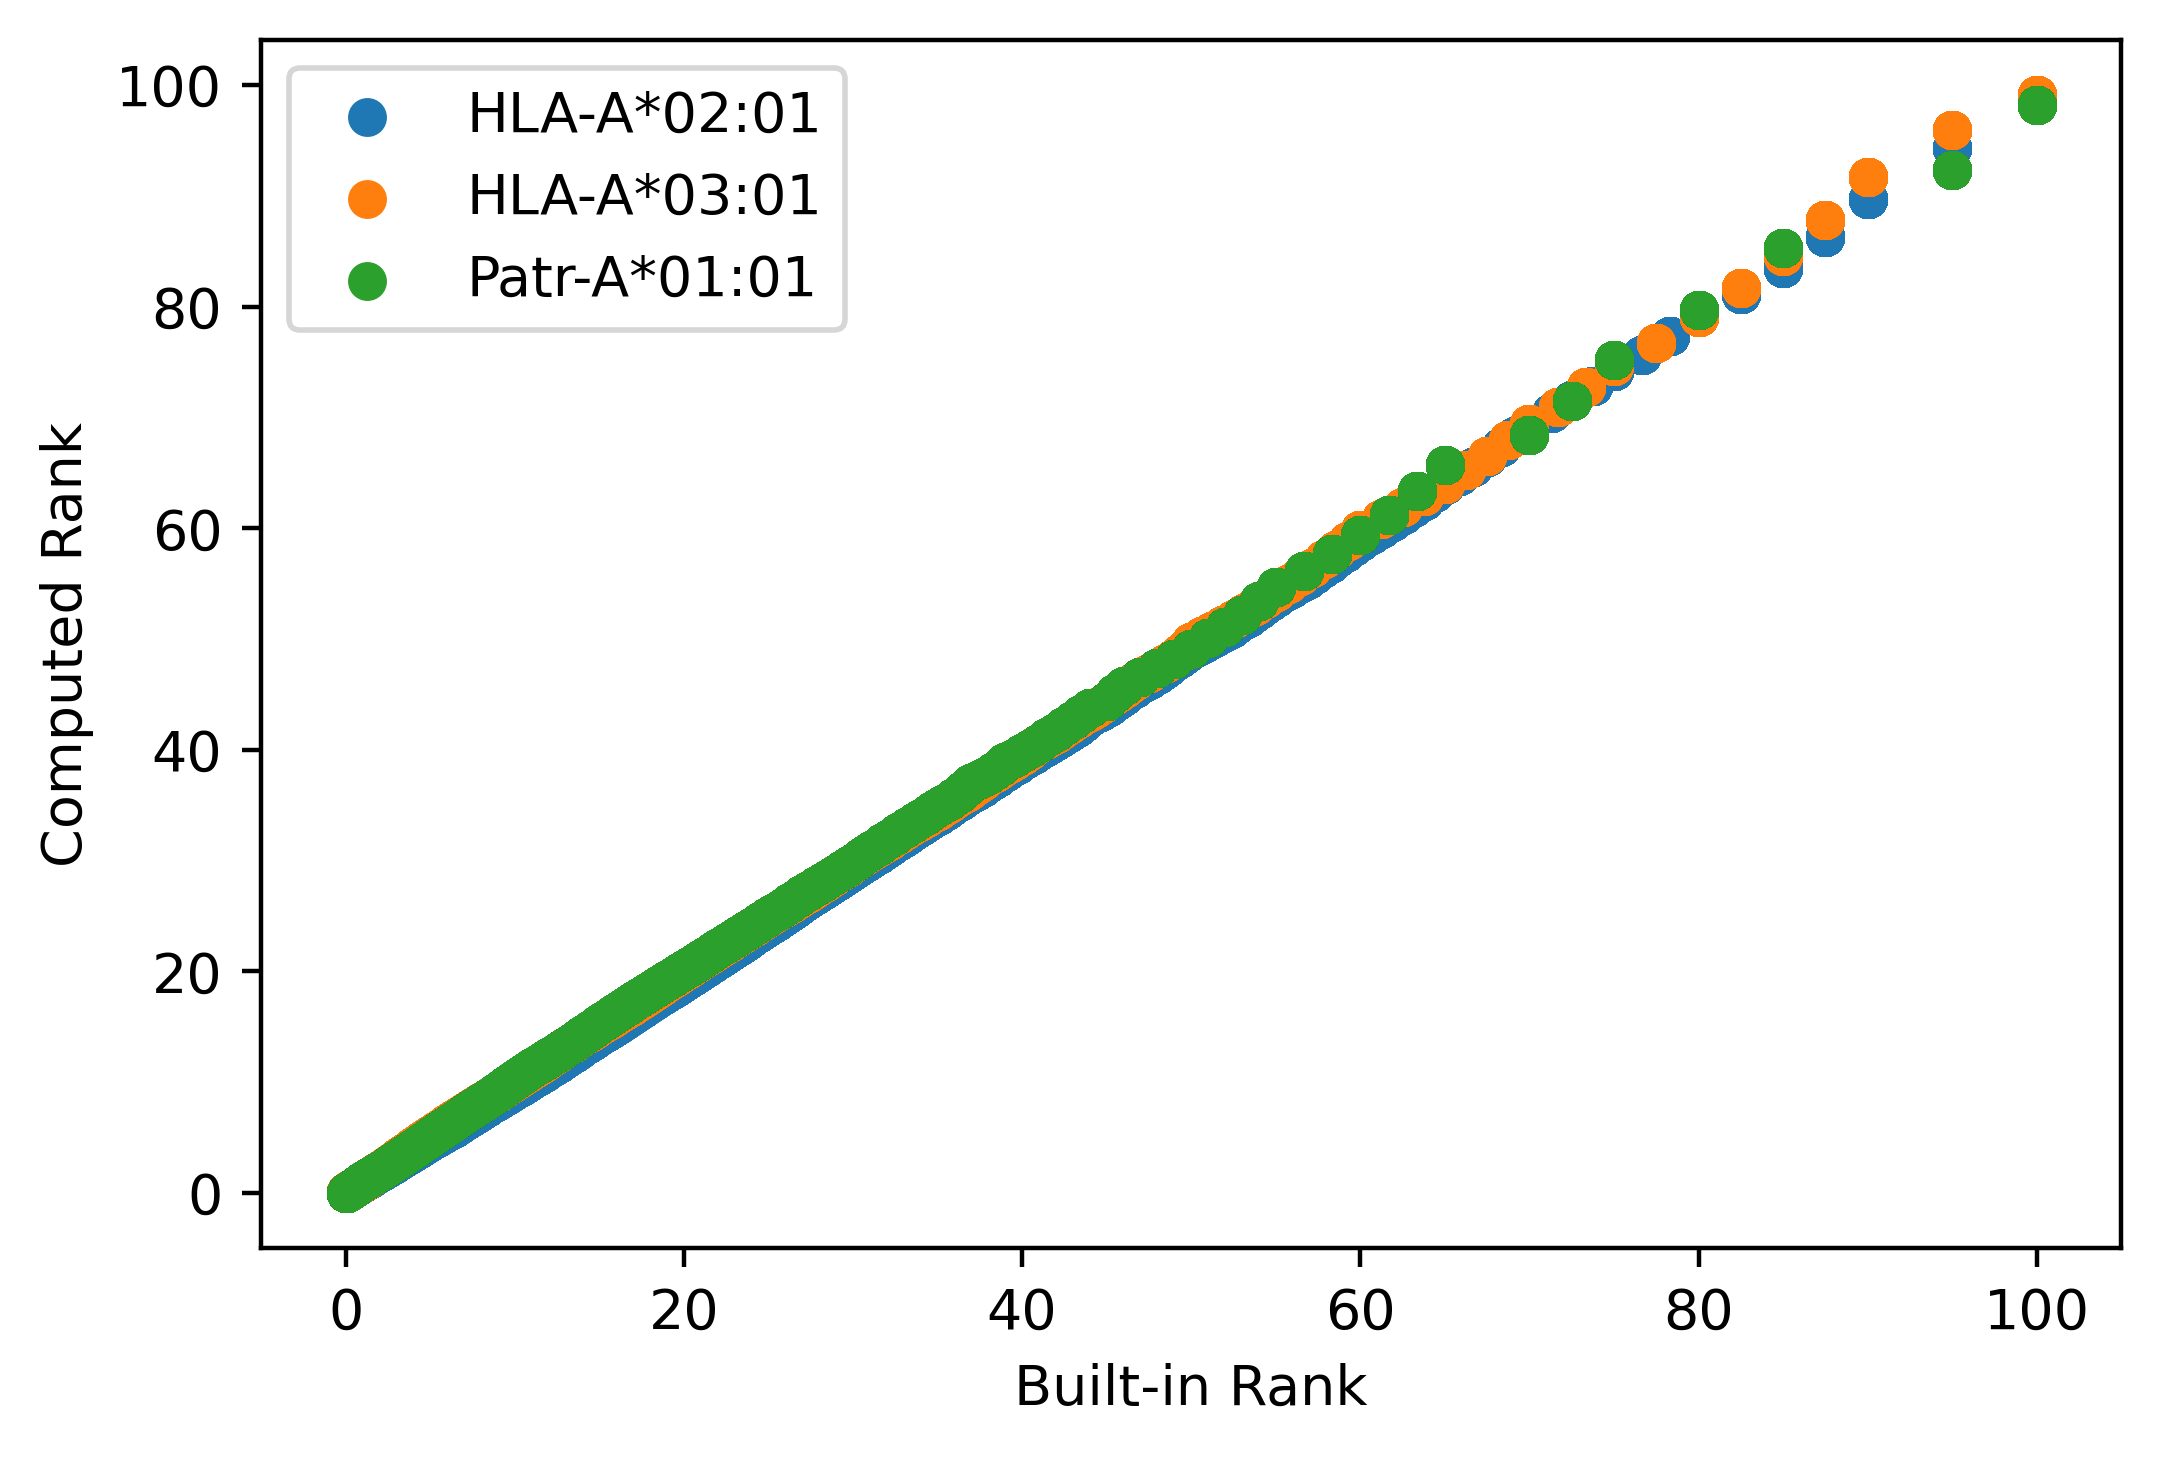

In [9]:
#Plot of built-in rank against computed rank
fig = plt.figure(dpi=300)
plt.scatter(list(HLA_A_02_01_df.iloc[:,3]), list(HLA_A_02_01_df.iloc[:,4]), label="HLA-A*02:01")
plt.scatter(list(HLA_A_03_01_df.iloc[:,3]), list(HLA_A_03_01_df.iloc[:,4]), label="HLA-A*03:01")
plt.scatter(list(Patr_A_01_01_df.iloc[:,3]), list(Patr_A_01_01_df.iloc[:,4]), label="Patr-A*01:01")
plt.xlabel("Built-in Rank")
plt.ylabel("Computed Rank")
plt.legend()

#Computing Spearman correlation coefficients
print("Spearman correlation HLA-A*02:01 - " + str(stats.spearmanr(list(HLA_A_02_01_df.iloc[:,2]), list(HLA_A_02_01_df.iloc[:,3]))))
print("Spearman correlation HLA-A*03:01 - " + str(stats.spearmanr(list(HLA_A_03_01_df.iloc[:,2]), list(HLA_A_03_01_df.iloc[:,3]))))
print("Spearman correlation Patr-A*01:01 - " + str(stats.spearmanr(list(Patr_A_01_01_df.iloc[:,2]), list(Patr_A_01_01_df.iloc[:,3]))))

(0.0, 5.0)

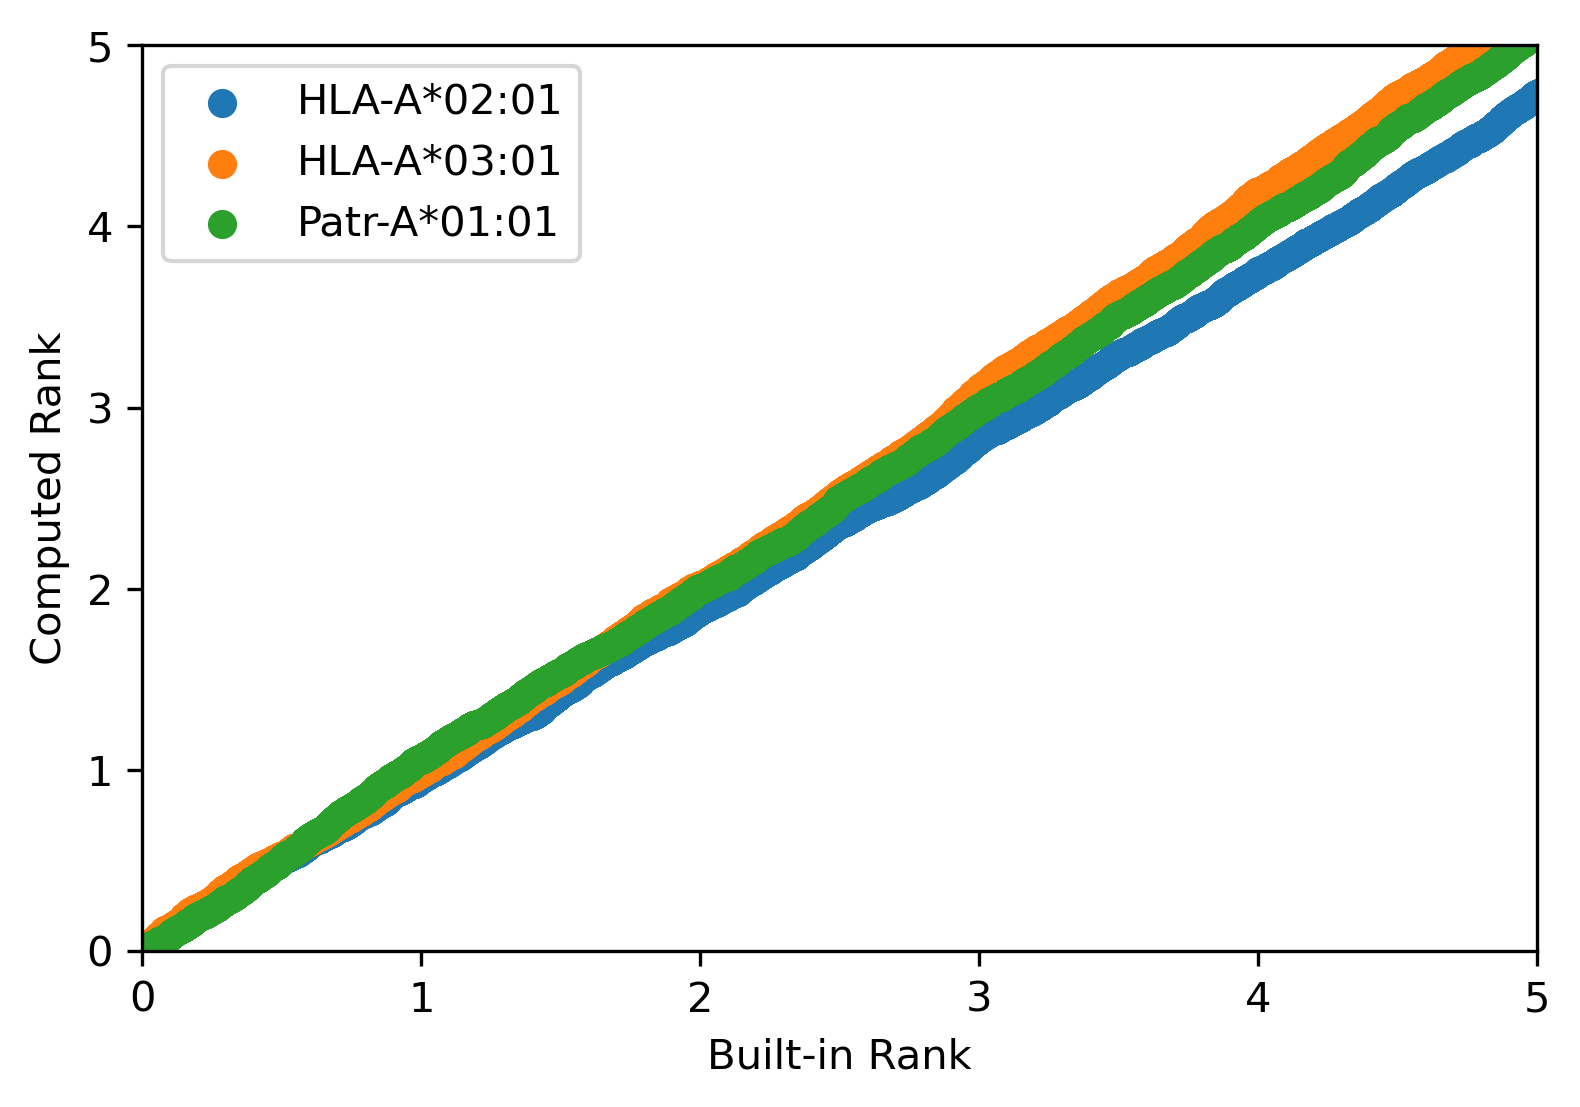

In [11]:
#Zoomed-in version
fig2 = plt.figure(dpi=300)
plt.scatter(list(HLA_A_02_01_df.iloc[:,3]), list(HLA_A_02_01_df.iloc[:,4]), label="HLA-A*02:01")
plt.scatter(list(HLA_A_03_01_df.iloc[:,3]), list(HLA_A_03_01_df.iloc[:,4]), label="HLA-A*03:01")
plt.scatter(list(Patr_A_01_01_df.iloc[:,3]), list(Patr_A_01_01_df.iloc[:,4]), label="Patr-A*01:01")
plt.xlabel("Built-in Rank")
plt.ylabel("Computed Rank")
plt.legend()
plt.xlim([0, 5])
plt.ylim([0, 5])

## Computing predicted binders

In [15]:
# Function to find the top binders
def top_binders(peptides, ranks, threshold) :
    if len(peptides) != len(ranks) :
        raise ValueError("Length of peptide names and binding scores must be equal")
    
    significant_binders = []
    
    for i in range(len(peptides)) :
        if ranks[i] <= threshold :
            significant_binders.append((peptides[i], ranks[i]))
    
    return significant_binders

#Computing significant binders grouped by virus
viruses = ["Western_lowland_gorilla_simian_foamy_virus", "Torque_teno_hominid_virus_1", "Alphapolyomavirus_gorillae", "Primate_bocaparvovirus_1", "Human_mastadenovirus_B", "Simian_immunodeficiency_virus_1", "Hepatitis_B_virus", "Human_metapneumovirus", "Torque_teno_virus_23", "Chimpanzee_associated_circovirus_1", "Chimpanzee_associated_cyclovirus_1", "Chimpanzee_associated_porprismacovirus_1", "Chimpanzee_faeces_associated_circular_DNA_virus_1", "Panine_alphaherpesvirus_3", "Primate_T-lymphotropic_virus", "Monkeypox_virus", "Rhinovirus_A"]
sig_binders_built_in_HLA_A_02_01 = {}
sig_binders_computed_HLA_A_02_01 = {}
sig_binders_built_in_HLA_A_03_01 = {}
sig_binders_computed_HLA_A_03_01 = {}
sig_binders_built_in_Patr_A_01_01 = {}
sig_binders_computed_Patr_A_01_01 = {}
grouped = HLA_A_02_01_df.groupby(HLA_A_02_01_df.Virus)
grouped2 = HLA_A_03_01_df.groupby(HLA_A_03_01_df.Virus)
grouped3 = Patr_A_01_01_df.groupby(Patr_A_01_01_df.Virus)

for virus in viruses :
    df = grouped.get_group(virus)
    df2 = grouped2.get_group(virus)
    df3 = grouped3.get_group(virus)
    sig_binders_built_in_HLA_A_02_01[virus] = list(zip(*top_binders(list(df["Peptide"]), list(df["Built-In Rank"]), 1)))[0]
    sig_binders_computed_HLA_A_02_01[virus] = list(zip(*top_binders(list(df["Peptide"]), list(df["Computed Rank"]), 1)))[0]
    sig_binders_built_in_HLA_A_03_01[virus] = list(zip(*top_binders(list(df2["Peptide"]), list(df2["Built-In Rank"]), 1)))[0]
    sig_binders_computed_HLA_A_03_01[virus] = list(zip(*top_binders(list(df2["Peptide"]), list(df2["Computed Rank"]), 1)))[0]
    sig_binders_built_in_Patr_A_01_01[virus] = list(zip(*top_binders(list(df3["Peptide"]), list(df3["Built-In Rank"]), 1)))[0]
    sig_binders_computed_Patr_A_01_01[virus] = list(zip(*top_binders(list(df3["Peptide"]), list(df3["Computed Rank"]), 1)))[0]

## Comparing similarity in predicted binders

Text(0, 0.5, 'Cosine Similarity of Predicted Epitopes')

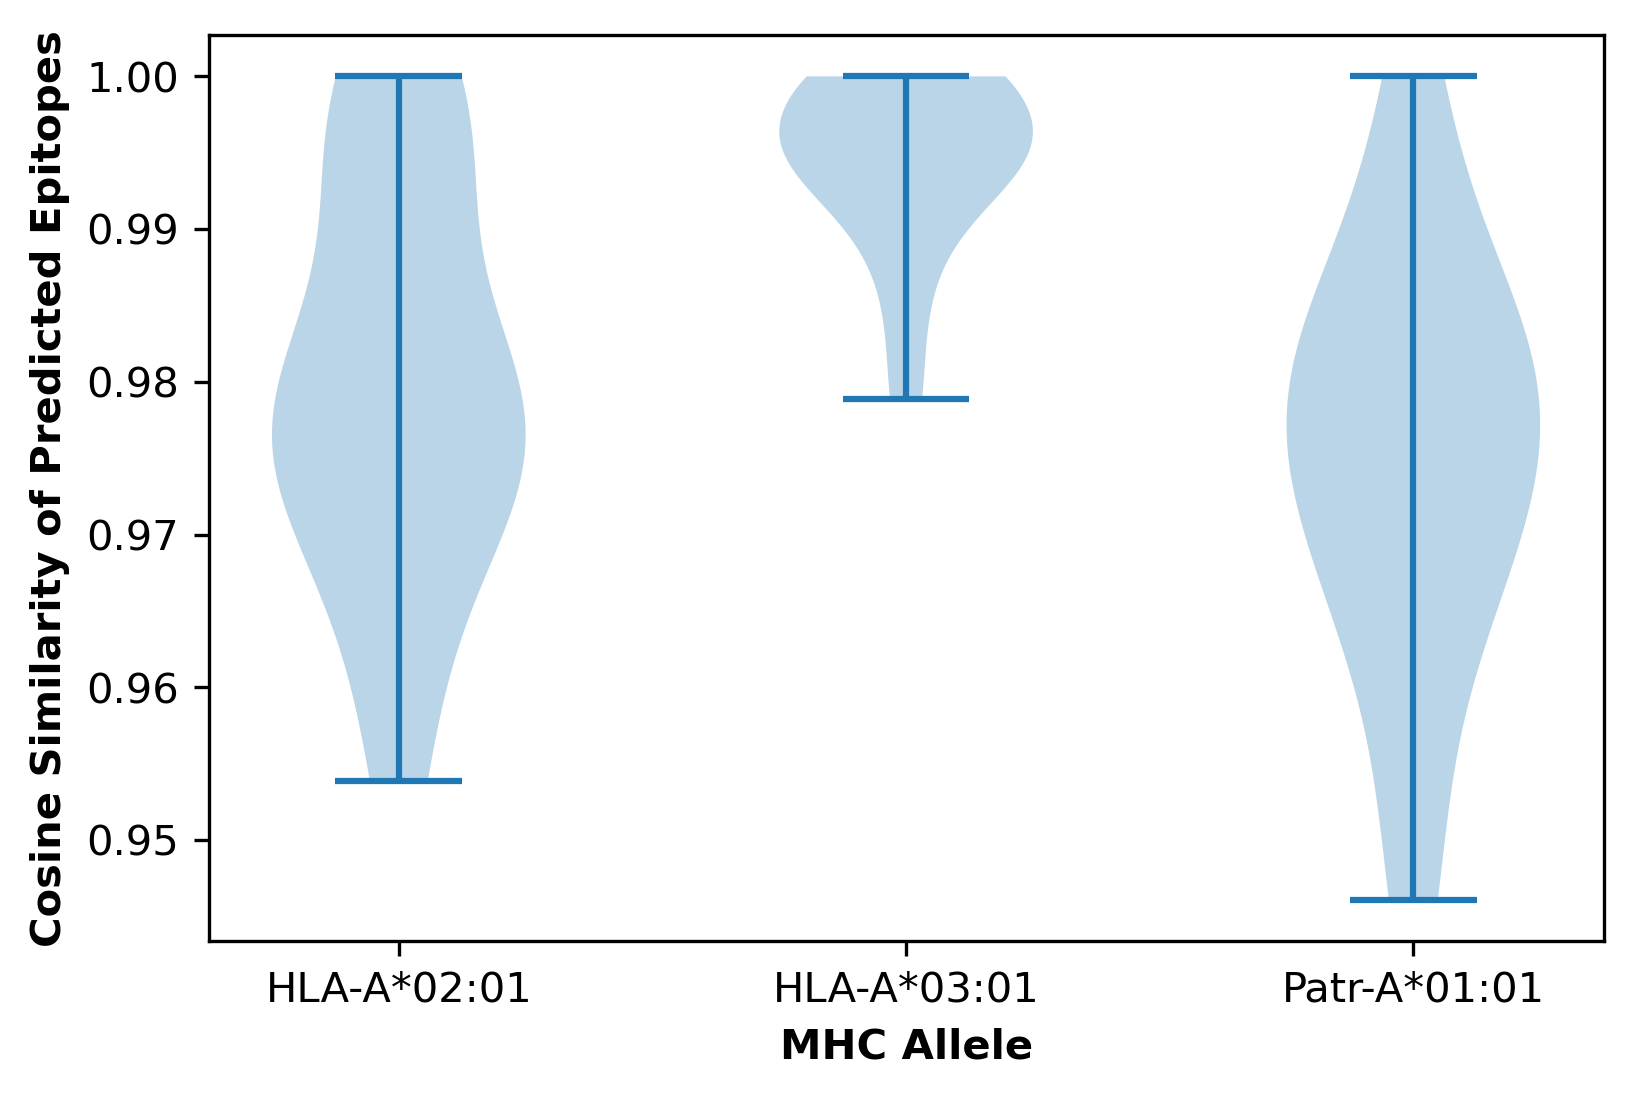

In [16]:
#Function to compare similarity between two lists
def counter_cosine_similarity(c1, c2):
    terms = set(c1).union(c2)
    dotprod = sum(c1.get(k, 0) * c2.get(k, 0) for k in terms)
    magA = math.sqrt(sum(c1.get(k, 0)**2 for k in terms))
    magB = math.sqrt(sum(c2.get(k, 0)**2 for k in terms))
    return dotprod / (magA * magB)

cos_similarity_HLA_A_02_01 = [counter_cosine_similarity(Counter(sig_binders_built_in_HLA_A_02_01[virus]), Counter(sig_binders_computed_HLA_A_02_01[virus])) for virus in viruses]
cos_similarity_HLA_A_03_01 = [counter_cosine_similarity(Counter(sig_binders_built_in_HLA_A_03_01[virus]), Counter(sig_binders_computed_HLA_A_03_01[virus])) for virus in viruses]
cos_similarity_Patr_A_01_01 = [counter_cosine_similarity(Counter(sig_binders_built_in_Patr_A_01_01[virus]), Counter(sig_binders_computed_Patr_A_01_01[virus])) for virus in viruses]

#Plotting
fig3, ax = plt.subplots(dpi=300)
plt.violinplot([cos_similarity_HLA_A_02_01, cos_similarity_HLA_A_03_01, cos_similarity_Patr_A_01_01])
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['HLA-A*02:01', 'HLA-A*03:01', 'Patr-A*01:01'])
ax.set_xlabel("MHC Allele", fontweight='bold')
ax.set_ylabel("Cosine Similarity of Predicted Epitopes", fontweight='bold')